In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv
/kaggle/input/churn-mdelling/Churn_Modelling.csv


In [80]:
df = pd.read_csv('/kaggle/input/churn-mdelling/Churn_Modelling.csv')

In [81]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [83]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [84]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [85]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True).astype(int)


In [86]:
X=df.drop(columns=['Exited'])
y = df['Exited']

In [87]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [128]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [131]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7937 - loss: 0.5237 - val_accuracy: 0.7994 - val_loss: 0.4609
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4374 - val_accuracy: 0.8188 - val_loss: 0.4343
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4203 - val_accuracy: 0.8288 - val_loss: 0.4212
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4190 - val_accuracy: 0.8325 - val_loss: 0.4088
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.3999 - val_accuracy: 0.8319 - val_loss: 0.3979
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3997 - val_accuracy: 0.8394 - val_loss: 0.3873
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3745 - val_accuracy: 0.8431 - val_loss: 0.3782
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3633 - val_accu

In [132]:
model.layers[0].get_weights()

[array([[ 0.0152862 ,  0.29782882,  0.05112904,  0.06611845,  0.23362663,
          0.3355604 , -0.3927735 , -0.10702386, -0.2254376 ,  0.8187854 ,
          0.10528144],
        [ 0.37421125, -0.12952884, -0.5229044 , -0.6616704 ,  0.6334204 ,
          0.8213659 ,  0.3322993 ,  1.0375946 , -0.57891554, -0.20313646,
          0.1258482 ],
        [ 0.06551907,  0.2557471 ,  0.12252833, -0.00388885, -0.046258  ,
          0.39503247,  0.31616622,  0.25998014, -0.20762739, -0.45917043,
         -0.08229007],
        [ 0.0405241 , -0.08697481, -0.07189368,  0.37217492,  0.4644316 ,
         -0.75251436, -0.08634041,  0.02296809,  0.3610845 ,  0.2927193 ,
          0.79951483],
        [-1.3523228 ,  0.16330859, -0.11645672, -0.04387699, -0.24095882,
          0.38118297,  0.22239274,  1.2168072 ,  0.28747815, -0.21306598,
          1.0379767 ],
        [ 0.12018071, -0.28202337,  0.14425963, -0.17813946,  0.32729363,
         -0.38616613,  0.18664725,  0.13868317, -0.0183403 ,  0.1418265

In [133]:
model.layers[1].get_weights()

[array([[ 4.46815878e-01, -7.06385970e-02, -4.18932110e-01,
         -4.40793842e-01,  3.69469915e-03,  2.01751322e-01,
         -6.26077533e-01, -2.64039665e-01, -6.69289947e-01,
         -1.16594279e+00,  4.39358205e-01],
        [-6.88478589e-01,  1.78065196e-01,  2.17032254e-01,
          2.12439090e-01, -2.36887559e-01,  9.06110257e-02,
         -1.92989498e-01, -3.63353491e-02, -9.56883505e-02,
          2.98556000e-01,  2.49743626e-01],
        [-7.39869773e-01, -5.89941204e-01, -1.99958190e-01,
          8.78894702e-02,  2.23872140e-01, -2.24257275e-01,
         -3.80166508e-02,  2.45261431e-01,  1.24466382e-02,
          4.57824647e-01, -5.02204061e-01],
        [-3.71463209e-01, -7.99681395e-02, -1.67496204e-01,
         -1.14365250e-01,  3.97257298e-01,  3.20133001e-01,
          4.00861889e-01,  8.53201002e-03, -1.91281363e-01,
         -2.04944357e-01, -4.62078065e-01],
        [ 2.93322355e-01,  2.24006668e-01,  3.38292450e-01,
          6.90008223e-01,  4.33949023e-01, -

In [134]:
model.layers[2].get_weights()

[array([[ 1.5200149 ],
        [ 0.7258511 ],
        [-1.4980239 ],
        [-1.0546212 ],
        [-0.87705016],
        [-0.591448  ],
        [-0.18093671],
        [-0.5484082 ],
        [-0.59122616],
        [-1.1071117 ],
        [ 0.52116704]], dtype=float32),
 array([-0.04834021], dtype=float32)]

In [135]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [136]:
y_pred=np.where(y_log>0.5,1,0)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8595

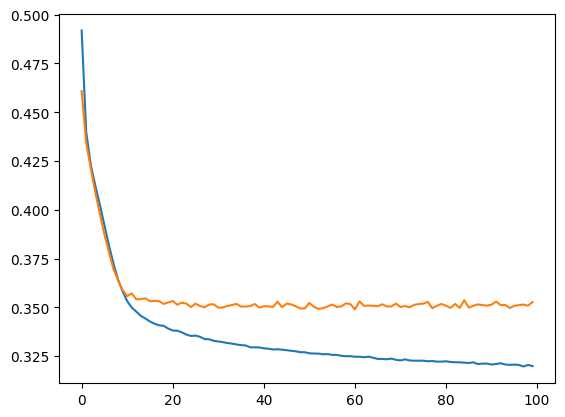

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

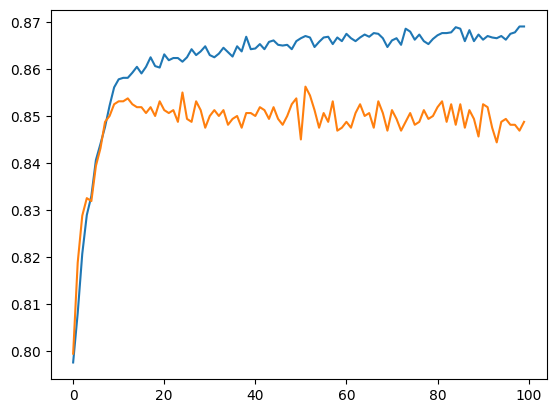

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])